# Pr9-2: 3Dモデルデータの表現

- V: 頂点数×3の行列データ
- F: 面数×面頂点の数の配列データ

以下では，6面ある立方体のデータを作成しています．

In [2]:
import numpy as np

# 立方体の頂点
V = np.array([[1.0,  1.0, -1.0],
             [1.0, -1.0, -1.0],
             [1.0,  1.0,  1.0],
             [1.0, -1.0,  1.0],
             [-1.0,  1.0, -1.0],
             [-1.0, -1.0, -1.0],
             [-1.0,  1.0,  1.0],
             [-1.0, -1.0,  1.0]])

# 立方体の面
F = np.array([[0, 4, 6, 2],
              [3, 2, 6, 7],
              [7, 6, 4, 5],
              [5, 1, 3, 7],
              [1, 0, 2, 3],
              [5, 4, 0, 1]])


## Work: 頂点情報の描画

具体的な描画を通してV, Fの意味を考えていきます．

まず，Vを描画してみます．
V[:,0]がx座標,  V[:,1]がy座標, V[:,2]がz座標を表すので，以下の形でプロットできます．

```
ax.scatter(V[:,0], V[:,1], V[:,2], color="orange", s=50)
```

単に頂点を表示するだけでなく，頂点番号も入れてみましょう．
以下では，各点から若干ずらして頂点番号を出力しています．

```
for i, v in enumerate(V):
  ax.text(v[0]+0.05, v[1]+0.05, v[2], "v{0}".format(i), size=20)
```

実際に，以下のplot_vertex関数を実装してみましょう．


In [3]:
def plot_vertex(ax, V):
  # Work: 頂点をプロットしてみましょう．
  ax.scatter(V[:,0], V[:,1], V[:,2], color="orange", s=50)

  # Work: 頂点番号を入れてみましょう
  for i, v in enumerate(V):
    ax.text(v[0]+0.05, v[1]+0.05, v[2], "v{0}".format(i), size=20)
  pass
  

plot_vertex関数が上手く実装されれば，以下を実行すると頂点情報が出ます．

Text(0.5, 0, 'Z')

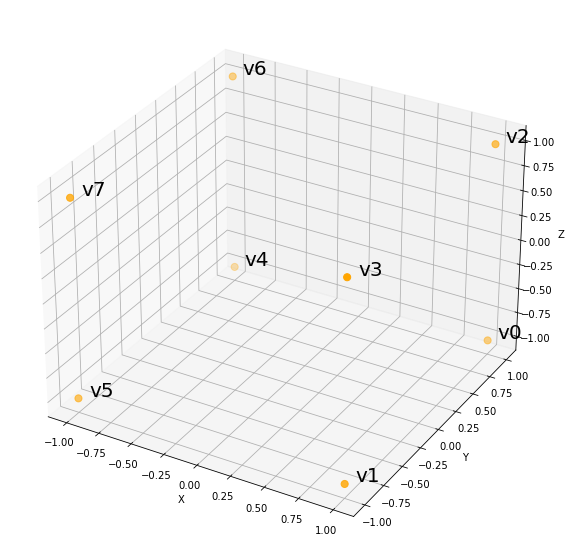

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# 実装されていれば頂点情報が出ます．
plot_vertex(ax, V)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Work: ポリゴンの描画

次は，1枚のポリゴンを描画する例です．<br>
例えば，F[0] = [0 4 6 2]ですが，これはv0, v4, v6, v2をつなぐという意味です．

以下のようにすると，

```
FV = V[F[0], :]
```

[V[0], V[4], V[6], V[2]]の座標列のデータを取り出せます．

matplotでは，以下のような形で面を描画できます．

```
ax.add_collection3d(art3d.Poly3DCollection([FV],facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, linewidth=linewidth))
```

facecolor（面の色）, edgecolor（エッジの色）などで面の描画の見た目を制御できます．
FVには各面の頂点座標列が入ります．

plot_face関数を実装してみましょう．(FV, facecolor以外はアレンジしてよい)
- FV: 引数をそのまま使いましょう
- facecolor: 引数をそのまま使いましょう
- edgecolor=[0, 0.7, 0]
- alpha=0.4
- linewidth=1.5

In [5]:
def plot_face(FV, facecolor):
  # Work: FV, facecolorを基に描画関数を設定してください．
  ax.add_collection3d(art3d.Poly3DCollection([FV],facecolor=facecolor, edgecolor=[0, 0.7, 0], alpha=0.4, linewidth=1.5))
  pass

F[0] = [0 4 6 2]

[[ 1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1.  1.]
 [ 1.  1.  1.]]


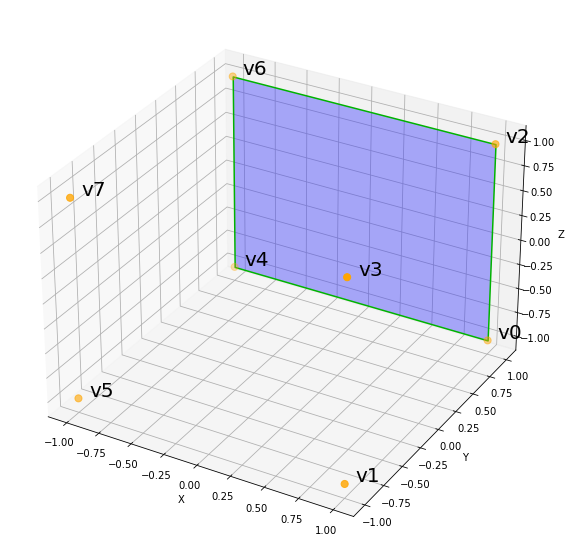

In [6]:
import mpl_toolkits.mplot3d.art3d as art3d

print("F[0] = {0}\n".format(F[0]))

FV = V[F[0], :]
print(FV)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

plot_vertex(ax, V)

# Work: 面の描画を行ってみましょう．
plot_face(FV, facecolor=[0.2, 0.2, 1.0])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');


### Work: 描画ループの実装

上記の処理を繰り返せば，立方体が描けます．

- num_facesを変えて描画の様子を確認してみましょう．

F[0] = [0 4 6 2]


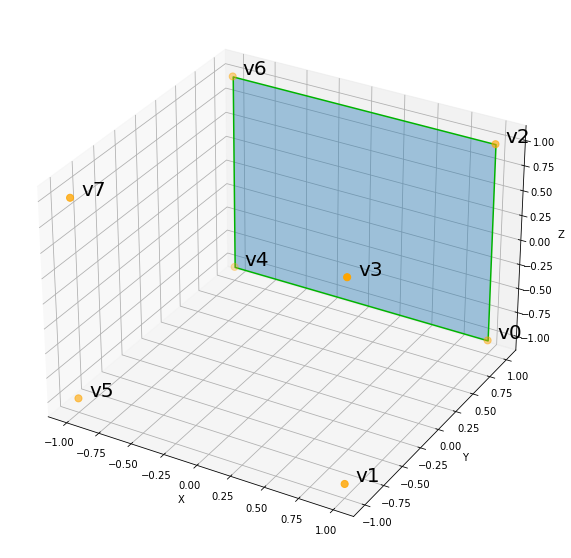

In [8]:
num_faces = 1 #@param {type: "slider", min: 1, max: 6}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.get_cmap("tab10")

for i in range(num_faces):
  f = F[i]
  print("F[{0}] = {1}".format(i,f))

  facecolor = colors(i)

  # Work: ループ部分の描画処理を入れてみましょう．
  FV = V[F[i], :]
  plot_face(FV, facecolor=facecolor)

plot_vertex(ax, V)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');